In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pathlib import Path
import scipy
import numpy as np
import os,sys

# for windows
'''
currentdir = Path.cwd()
sys.path.insert(0,str(currentdir)+'\\utils') 
'''

# for ubuntu
os.chdir('./utils')
import skseq
import skseq.sequences.structured_perceptron as spc
from utils import *

ModuleNotFoundError: No module named 'tensorflow'

This notebook loads the data, loads the fitted models from disk and evaluates the models.

## Loading Data

In [2]:
corpus = NerCorpus()

In [3]:
data_path = "../data"

#data_path = parentdir + data_path

train_seq = corpus.read_sequence_list(data_path + "/train_data_ner.csv", 
                                            max_sent_len=100)

test_seq = corpus.read_sequence_list(data_path + "/test_data_ner.csv",
                                           max_sent_len=100)

tiny_test_seq = corpus.read_sequence_list(data_path + "/tiny_test.csv", 
                                          max_sent_len=100)

In [4]:
train_metrics = {'Accuracy':[],'F1':[]}
test_metrics = {'Accuracy':[],'F1':[]}
tiny_test_metrics = {'Accuracy':[],'F1':[]}
names = []

## Tiny test print

In [5]:
print(decode_pred(tiny_test_seq.seq_list, corpus))

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
The/O programmers/O from/O Barchelona/B-geo cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
Jack/B-per London/I-per went/O to/O Parris/B-geo ./O 
Jack/B-per London/I-per went/O to/O Paris/B-geo ./O 
Bill/B-per gates/I-per and/O Steve/B-per jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
The/O president/O of/O U.S.A/B-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 
Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 
Apple/B-org is/O a/O great/O company/O

## Structure Perceptron

### Structure Perceptron w/ given features

In [6]:
feature_mapper = skseq.sequences.id_feature.IDFeatures(train_seq)
feature_mapper.build_features()

sp = spc.StructuredPerceptron(corpus.word_dict, corpus.tag_dict, feature_mapper)
sp.load_model(dir="../fitted_models/perceptron_5_iter_given")

In [21]:
#pred_train = sp.viterbi_decode_corpus(train_seq)
#pred_test  = sp.viterbi_decode_corpus(test_seq)
pred_tiny_test  = sp.viterbi_decode_corpus(tiny_test_seq)

/home/edge/Documentos/NER_task/utils/utils.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(class_names), rotation=45)
/home/edge/Documentos/NER_task/utils/utils.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_names))


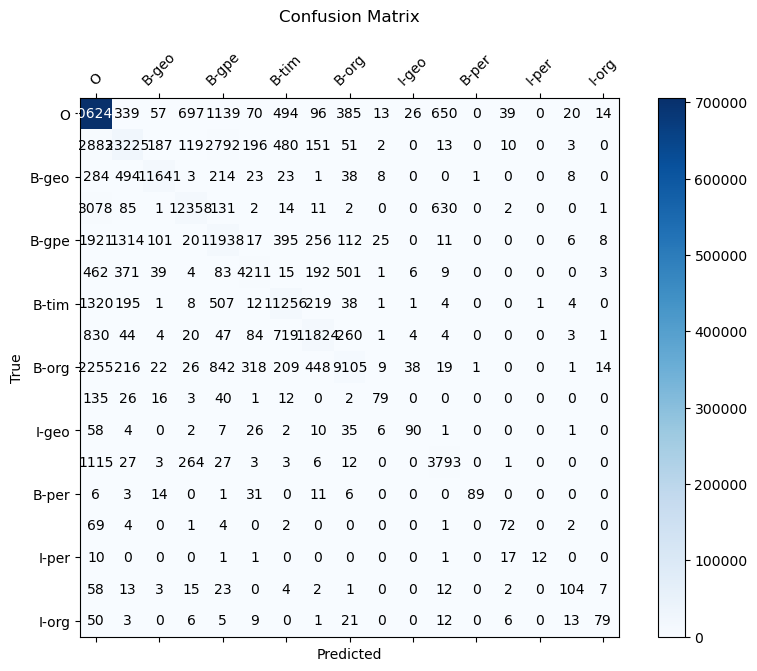

In [8]:
'''
acc, f1 = Evaluate_metrics(train_seq.seq_list, pred_train, corpus)
train_metrics['Accuracy'].append(acc)
train_metrics['F1'].append(f1)
names.append('SP-given')
'''

/home/edge/Documentos/NER_task/utils/utils.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(class_names), rotation=45)
/home/edge/Documentos/NER_task/utils/utils.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_names))


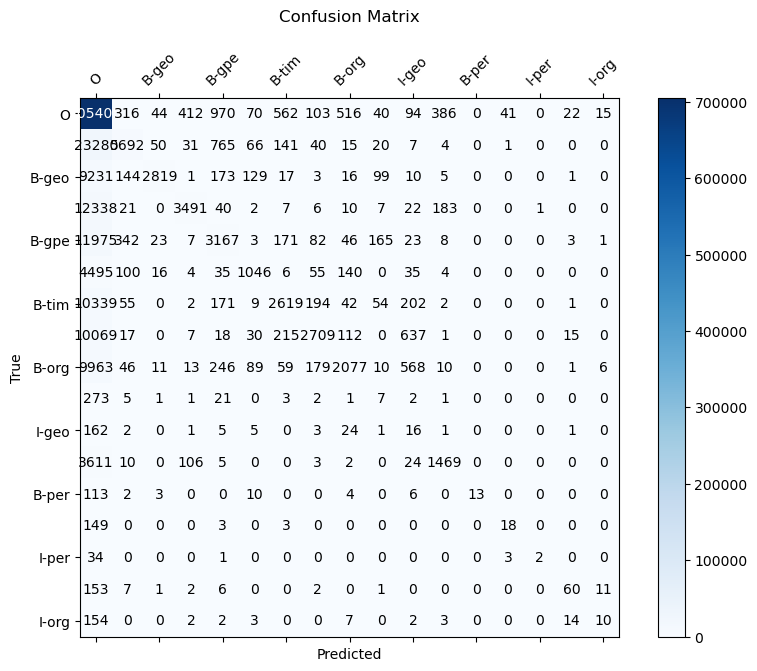

In [9]:
'''
acc, f1 = Evaluate_metrics(test_seq.seq_list, pred_test, corpus)
test_metrics['Accuracy'].append(acc)
test_metrics['F1'].append(f1)
names.append('SP-given')
'''

/home/edge/Documentos/NER_task/utils/utils.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(class_names), rotation=45)
/home/edge/Documentos/NER_task/utils/utils.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_names))


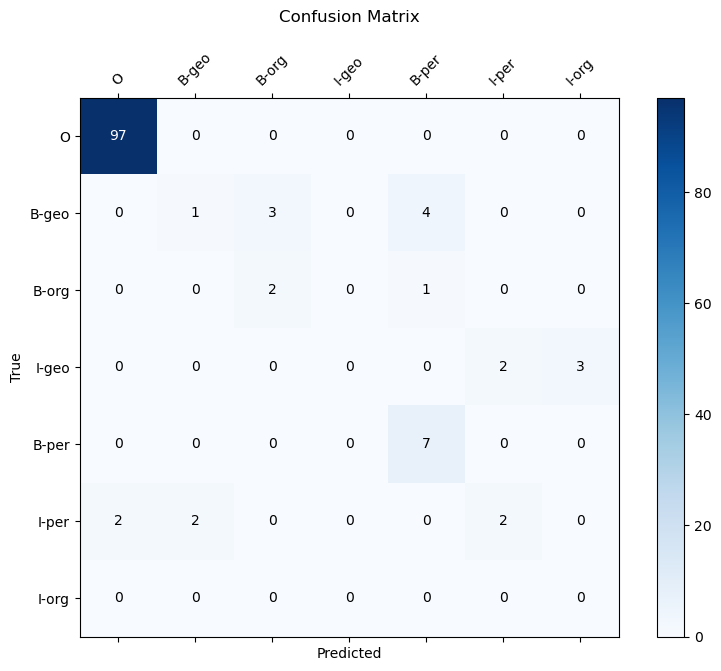

In [22]:
acc, f1 = Evaluate_metrics(tiny_test_seq.seq_list, pred_tiny_test, corpus)
tiny_test_metrics['Accuracy'].append(acc)
tiny_test_metrics['F1'].append(f1)
names.append('SP-given')

In [9]:
print(decode_pred(pred_tiny_test, corpus))

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
Jack/B-per London/B-geo went/O to/O Parris/O ./O 
Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 
Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
The/O president/O of/O U.S.A/O thought/O they/O could/O win/O the/O war/O ./O 
The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O king/O of/O Saudi/B-per Arabia/I-per wanted/O total/O control/O ./O 
Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-org Arabia/I-org ./O 
Apple/O is/O a/O great/O company/O ./O 
I/O really/O love/

### Structure Perceptron w/ extra features

In [12]:
from skseq.sequences.extended_features import *

feature_mapper_ext = Extended_Features(train_seq)
feature_mapper_ext.build_features()

sp = spc.StructuredPerceptron(corpus.word_dict, corpus.tag_dict, feature_mapper_ext)
sp.load_model(dir="../fitted_models/perceptron_5_iter_extra")

In [23]:
#pred_train  = sp.viterbi_decode_corpus(train_seq)tiny_test_metrics
#pred_test  = sp.viterbi_decode_corpus(test_seq)
pred_tiny_test  = sp.viterbi_decode_corpus(tiny_test_seq)

/home/edge/Documentos/NER_task/utils/utils.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(class_names), rotation=45)
/home/edge/Documentos/NER_task/utils/utils.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_names))


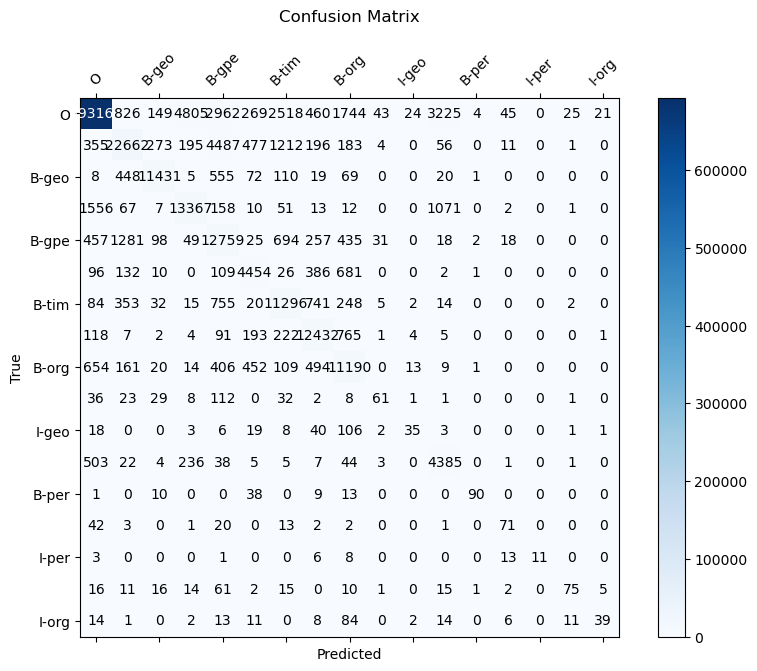

In [15]:
'''
acc, f1 = Evaluate_metrics(train_seq.seq_list, pred_train, corpus)
train_metrics['Accuracy'].append(acc)
train_metrics['F1'].append(f1)
names.append('SP-extra')
'''

/home/edge/Documentos/NER_task/utils/utils.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(class_names), rotation=45)
/home/edge/Documentos/NER_task/utils/utils.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_names))


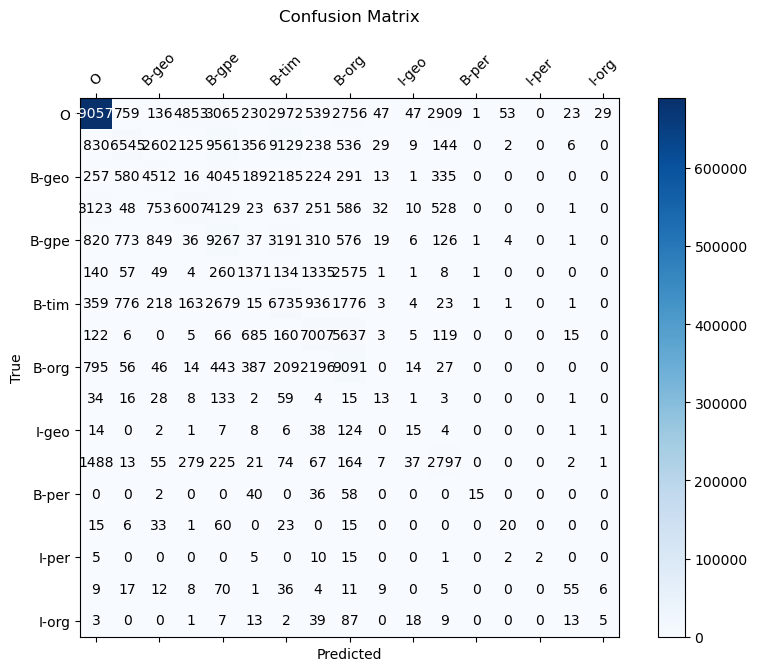

In [16]:
'''
acc, f1 = Evaluate_metrics(test_seq.seq_list, pred_test, corpus)
test_metrics['Accuracy'].append(acc)
test_metrics['F1'].append(f1)
names.append('SP-extra')
'''

/home/edge/Documentos/NER_task/utils/utils.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(class_names), rotation=45)
/home/edge/Documentos/NER_task/utils/utils.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_names))


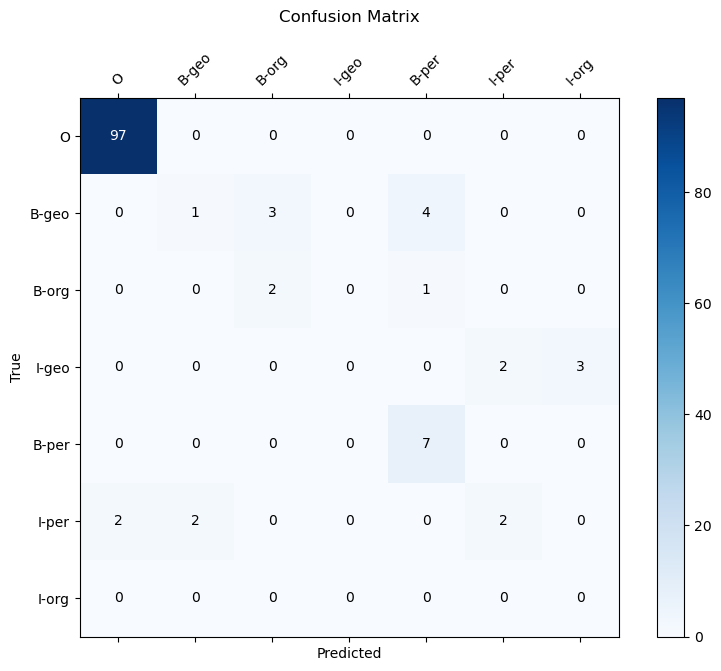

In [24]:
acc, f1 = Evaluate_metrics(tiny_test_seq.seq_list, pred_tiny_test, corpus)
tiny_test_metrics['Accuracy'].append(acc)
tiny_test_metrics['F1'].append(f1)
names.append('SP-extra')

In [13]:
print(decode_pred(pred_tiny_test, corpus))

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
The/O programmers/O from/O Barchelona/B-org cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
Jack/B-per London/B-geo went/O to/O Parris/B-per ./O 
Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 
Bill/B-per gates/O and/O Steve/B-per jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
The/O president/O of/O U.S.A/B-per thought/O they/O could/O win/O the/O war/O ./O 
The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org thought/O they/O could/O win/O the/O war/O ./O 
The/O king/O of/O Saudi/B-per Arabia/I-per wanted/O total/O control/O ./O 
Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-per Arabia/I-per ./O 
Apple/B-per is/O a/O great/O company/O ./O 
I/

In [19]:
train_metrics

{'Accuracy': [0.775808230670043, 0.8106231260389318],
 'F1': [0.9596892805265126, 0.9529061595047117]}

In [18]:
test_metrics

{'Accuracy': [0.1966695265579908, 0.416948755947274],
 'F1': [0.8385067300727705, 0.8914458505622624]}

In [26]:
tiny_test_metrics

{'Accuracy': [0.41379310344827586, 0.41379310344827586],
 'F1': [0.8454178116906367, 0.8454178116906367]}

## Deep Learning Approach

### Bi-LSTM

In [ ]:
train_df = pd.read_csv('./data/train_data_ner.csv', encoding="latin1").fillna(method="ffill")
test_df = pd.read_csv("./data/test_data_ner.csv", encoding="latin1").fillna(method="ffill")
tiny_test_df = pd.read_csv("./data/tiny_test.csv", encoding="latin1").fillna(method="ffill")

In [2]:
# PREPROCESSING

In [ ]:
# concatenating 3 df to create 1 vocabulary
concatenated_df = pd.concat([train_df, test_df, tiny_test_df], ignore_index=True)

# creating vocabulary
word2idx, tag2idx, n_words, n_tags, tags = create_vocabulary_bilstm(concatenated_df)

# getting sentences
train_getter = SentenceGetter(train_df)
test_getter = SentenceGetter(test_df)
tiny_test_getter = SentenceGetter(tiny_test_df)

train_sentences = train_getter.sentences
test_sentences = test_getter.sentences
tiny_test_sentences = tiny_test_getter.sentences

# Encode and pad sequences for each dataset
X_train, y_train = encode_and_pad_sequences_bilstm(train_sentences, tags, word2idx, tag2idx, n_words, max_len=50)
X_test, y_test = encode_and_pad_sequences_bilstm(test_sentences,tags, word2idx, tag2idx, n_words, max_len=50)
X_tiny_test, y_tiny_test = encode_and_pad_sequences_bilstm(tiny_test_sentences, tags, word2idx, tag2idx, n_words, max_len=50)

In [ ]:
# creating dataset and dataloader
tiny_test_dataset = NERDataset(X_tiny_test, y_tiny_test)

tiny_test_loader = DataLoader(tiny_test_dataset, batch_size=32, shuffle=True)

In [ ]:
# Load the model
model = BiLSTMModel(vocab_size=n_words, tagset_size=n_tags, padding_idx=n_words-1)
model.load_state_dict(torch.load('bi-lstm_model2.pth'))
model.eval()

In [ ]:
# Evaluate the model on the test set
eval_loss, eval_accuracy, eval_accuracy_without_o, f1 = evaluate_bilstm_tiny_test(model, tiny_test_loader, loss_function, n_tags, tag2idx)

print(f"Test Loss: {eval_loss}")
print(f"Test Accuracy: {eval_accuracy}")
print(f"Test Accuracy without 'O': {eval_accuracy_without_o}")
print(f"Test F1 Score: {f1}")

# Get predicted and true tags for further analysis
preds, labels = get_predictions_and_labels(model, tiny_test_loader)

In [ ]:
# Define idx2word and idx2tag mappings
idx2word = {v: k for k, v in word2idx.items()}
idx2tag = {v: k for k, v in tag2idx.items()}

# Convert tags to sentences
tagged_sentences = tags_to_sentences(tiny_test_sentences, preds, idx2word, idx2tag)

# Print example sentences with predicted tags
for sentence in tagged_sentences:
    print(sentence)

In [ ]:
tt_word2idx, tt_tag2idx, tt_n_words, tt_n_tags, tt_tags = create_vocabulary_bilstm(tiny_test_df)

In [ ]:
# Define idx2word and idx2tag mappings
tt_idx2word = {v: k for k, v in tt_word2idx.items()}
tt_idx2tag = {v: k for k, v in tt_tag2idx.items()}

In [ ]:
plot_confusion_matrix_bilstm(y_tiny_test, preds, tt_idx2tag, save=True)

### Pre-trained